Travail de Dao THAUVIN et Luc STERKERS

# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [80]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [81]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,.6]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int64
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [82]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [83]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [84]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [85]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [86]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])
print(I)
#print(I[0:-1])

6
0
8
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [87]:
print('extract the first line')
print(I)

print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [88]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [89]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
print(C)
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

[[1]
 [2]
 [3]
 [4]
 [5]]
A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [90]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('img/moon.tif'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('img/moon_2.tif')

In [91]:
myimage.shape

(537, 358)

Array can be displayed as an image using Matplotlib module. Here a short example:

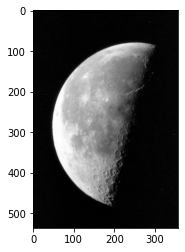

In [92]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

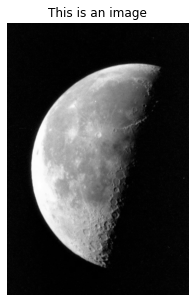

In [93]:
# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()

See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py). 

## Exercice 1
In this exercice, we work with image `img/moon.tif`. If possible give two solutions : one with loops (for, while, ...) and one without loops. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [94]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    return np.array(Image.open(fname))

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [95]:
def countPixels(I,k):
    """ Array*int -> int"""
    return sum(I==k)

def countPixelsBoucle(I,k):
    """ Array*int -> int"""
    tot=0
    for V in I:
        for i in V:
            if i==k:
                tot += 1        
    return tot

3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [96]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    #ret = I.copy()
    return np.where(I==k1, k2, I)

def replacePixelsBoucle(I,k1,k2):
    I2=I.copy()
    for i,V in enumerate(I):
        for j,v in enumerate(V):
            if v==k1:
                I2[i][j] = k2
    return I2

4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [97]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    maxI = np.max(I)
    minI = np.min(I)
    return (I - minI)*((k2-k1)/(maxI - minI)) + k1
    
def normalizeImageBoucle(I,k1,k2):
    """ Array*int*int -> Array """
    I2 = I.copy()
    maxI = np.max(I)
    minI = np.min(I)
    for i,V in enumerate(I):
        for j,v in enumerate(V):
            I2[i][j] = (v - minI)*((k2-k1)/(maxI - minI)) + k1
    return I2


5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

In [98]:
def inverteImage(I):
    """ Array -> Array """
    return np.abs(255 - I)

def inverteImageBoucle(I):
    I2=np.zeros(I.shape)
    for i,V in enumerate(I):
        for j,v in enumerate(V):
            I2[i][j] = abs(255-v)
    return I2

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [99]:
def computeHistogram(I):
    """ Array -> list[int] """
    hist = 256*[0]
    for i in I.reshape(-1):
        hist[int(i)] += 1
    return hist
    
# It's not possible, we need to count how many pixel of each values we have. So we need to visit every pixels

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

In [100]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    return np.where(I<s,0,255)

def thresholdImageBoucle(I,s):
    I2=I.copy()
    for i,V in enumerate(I):
        for j,v in enumerate(V):
            I2[i][j] = 0 if v < s else 255
    return I2

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

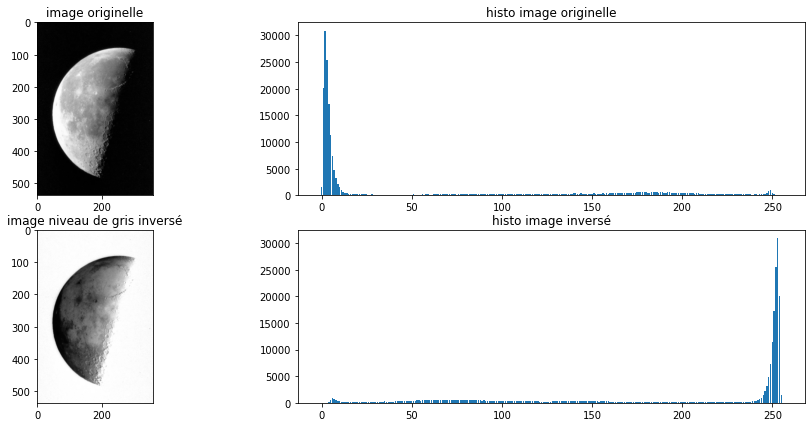

In [101]:
import matplotlib.pyplot as plt

im = openImage("img/moon.tif")
inv_im = inverteImage(im)
#inv_im = inverteImageBoucle(im)

fig, ax = plt.subplots(2,2,figsize=(15,7), gridspec_kw={'width_ratios': [1, 2]})
ax[0][0].imshow(im)
ax[0][1].bar(np.arange(0,256),computeHistogram(im)[:])

ax[0][0].set_title("image originelle")
ax[0][1].set_title("histo image originelle")
ax[1][0].set_title("image niveau de gris inversé")
ax[1][1].set_title("histo image inversé")

ax[1][0].imshow(inv_im)
ax[1][1].bar(np.arange(0,256),computeHistogram(inv_im)[:])
plt.show()

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

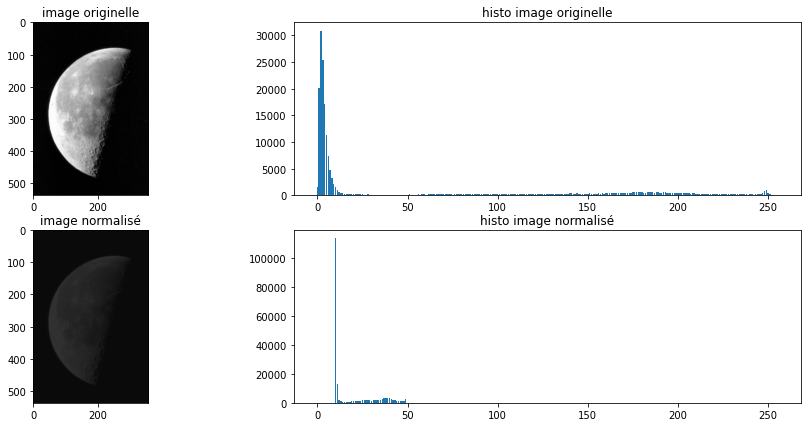

In [102]:
import matplotlib.pyplot as plt

im = openImage("img/moon.tif")
norm_im = normalizeImage(im,10,50)
#norm_im = normalizeImageBoucle(im,10,50)

fig, ax = plt.subplots(2,2,figsize=(15,7), gridspec_kw={'width_ratios': [1, 2]})
ax[0][0].imshow(im)
ax[0][1].bar(np.arange(0,256),computeHistogram(im)[:])

ax[0][0].set_title("image originelle")
ax[0][1].set_title("histo image originelle")
ax[1][0].set_title("image normalisé")
ax[1][1].set_title("histo image normalisé")

ax[1][0].imshow(norm_im,vmin=0,vmax=255)
ax[1][1].bar(np.arange(0,256),computeHistogram(norm_im))
plt.show()


10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

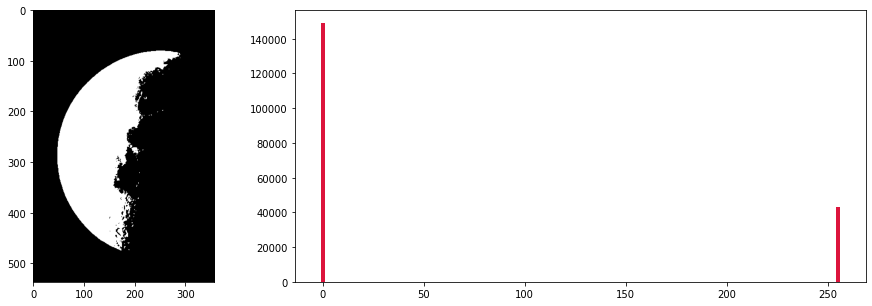

In [103]:
thre_im= thresholdImage(im, 127)
#thre_im= thresholdImageBoucle(im, 127)

fig, ax = plt.subplots(ncols=2,figsize=(15,5), gridspec_kw={'width_ratios': [1, 3]})
ax[0].imshow(thre_im)
ax[1].bar(np.arange(0,256),computeHistogram(thre_im), width=2, color = 'crimson')
plt.show()

## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 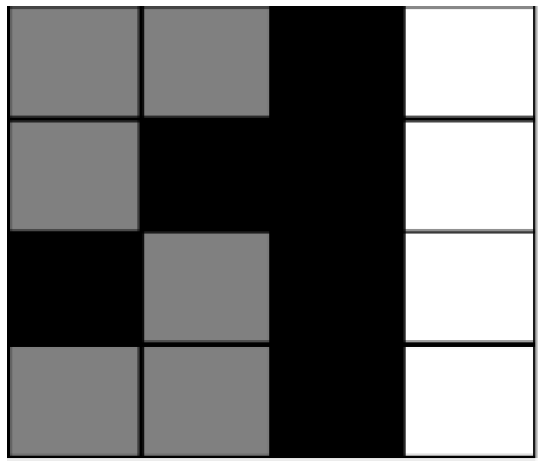 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

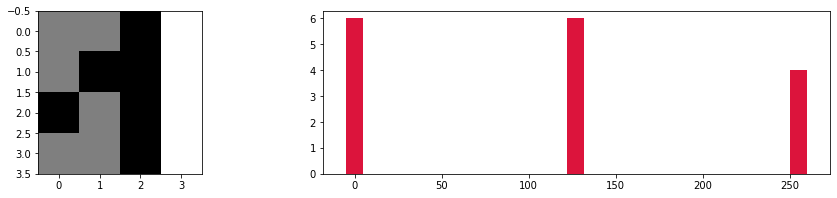

In [104]:
a = np.array([[127,127,0,255],
     [127, 0 ,0,255],
     [ 0 ,127,0,255],
     [127,127,0,255]])

fig, ax = plt.subplots(ncols=2,figsize=(15,3), gridspec_kw={'width_ratios': [1, 2]})
ax[0].imshow(a)
ax[1].bar(np.arange(0,256),computeHistogram(a), width=10, color = 'crimson')
plt.show()

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

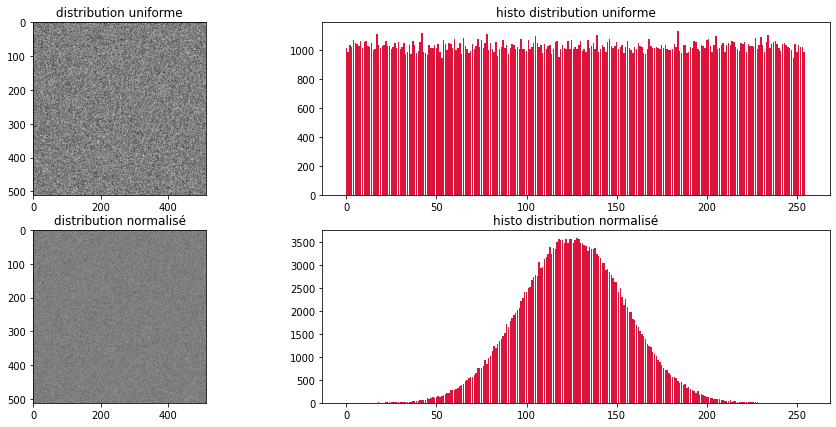

In [105]:
import numpy.matlib

rd = np.array(np.intc(normalizeImage(np.matlib.rand(512,512),0,255)))
rd_n = np.array(np.intc(normalizeImage(np.matlib.randn(512,512),0,255)))

fig, ax = plt.subplots(2,2,figsize=(15,7), gridspec_kw={'width_ratios': [1, 2]})
ax[0][0].imshow(rd)
ax[0][1].bar(np.arange(0,256),computeHistogram(rd), width=0.8,color = 'crimson')

ax[0][0].set_title("distribution uniforme")
ax[0][1].set_title("histo distribution uniforme")
ax[1][0].set_title("distribution normalisé")
ax[1][1].set_title("histo distribution normalisé")

ax[1][0].imshow(rd_n)
ax[1][1].bar(np.arange(0,256),computeHistogram(rd_n), width=0.8,color = 'crimson')
plt.show()

La distribution normalisé donne une image plus uniforme en niveau de gris que la distribution uniforme

## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.tif`. 

1. Read and display this image

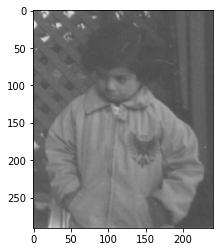

In [106]:
tmp = openImage("img/pout.tif")
plt.imshow(tmp, vmin=0,vmax= 255)
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

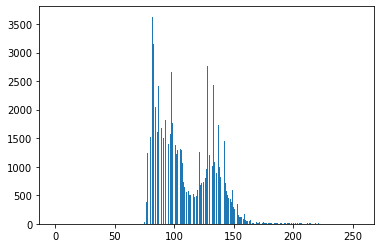

min : 74
max : 224


In [107]:
plt.bar(np.arange(0,256),computeHistogram(tmp)[:])
plt.show()
print('min :',np.min(tmp))
print('max :',np.max(tmp))

L'histogramme est trés centré. Le contrast est faible. La photo est de mauvaise qualitée.

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.tif` and discuss the result.

In [114]:
def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    L = 255 #L value for grayscales
    hc=np.cumsum(h)
    return np.array([[np.intc((L/(I.shape[0]*I.shape[1]))*hc[j]) for j in i] for i in I])

new_im = histogramEqualization(tmp,computeHistogram(tmp))

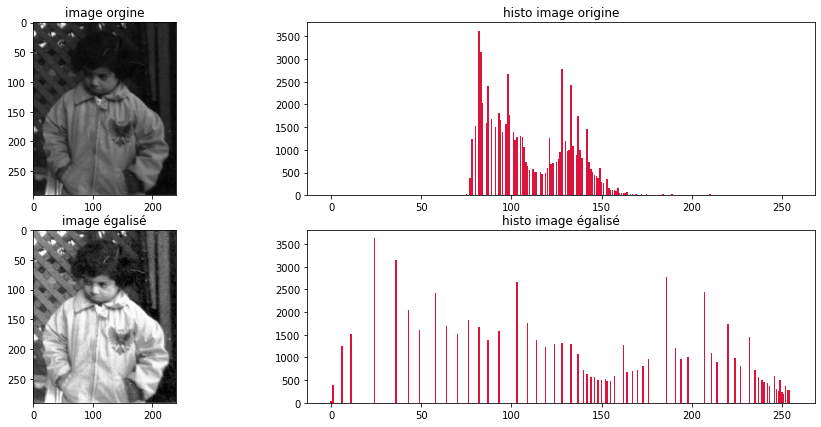

In [113]:
fig, ax = plt.subplots(2,2,figsize=(15,7), gridspec_kw={'width_ratios': [1, 2]})
ax[0][0].imshow(tmp)
ax[0][1].bar(np.arange(0,256),computeHistogram(tmp), width=0.8,color = 'crimson')

ax[0][0].set_title("image orgine")
ax[0][1].set_title("histo image origine")
ax[1][0].set_title("image égalisé")
ax[1][1].set_title("histo image égalisé")

ax[1][0].imshow(new_im)
ax[1][1].bar(np.arange(0,256),computeHistogram(new_im), width=0.8,color = 'crimson')
plt.show()

On remarque que l'histogramme c'est dilaté avec l'égalisation. On perd en contraste mais on peut voir des détails invisible sur l'image originelle, sur l'image modifié.